<h1 style = "color : #3777FF; text-align : center;"><em>Where should I live?</em> - Data Wrangling and Analysis Notebook</h1>
<p style = "font-size : 16px; text-align: center;">This notebook is dedicated only to the exploration of the <code>city_data</code> dataset</p>
<br>
<p style = "font-size : 12px; text-align: center;"><b>NOVA IMS</b></p>
<p style = "font-size : 10px; text-align: center;">Programming for Data Science</p>
<p style = "font-size : 10px; text-align: center;">Diogo Gonçalves, João Marques, Juan Mendes & Gustavo Franco</p>
<br>

<h2 style = "color : #3777FF;"> Imports </h2>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr style = "border: 3px solid #3777FF;">
<h2 style = "color : #3777FF;">Dataset Reading </h2>
<p style = "font-size : 15px;">Reading of dataset from <code>city_data.csv</code> file</p>
<p>The dataset is in a <code>.csv</code> file, and uses <code>|</code> as a separator. The first row of the file is also blank, so we read it using <code>skiprows = 1</code>. </p>

In [30]:
city_data = pd.read_csv("city_data.csv", sep = "|", skiprows = 1)
city_data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


<hr style = "border: 3px solid #3777FF;">
<h2 style = "color : #3777FF;">Handling Duplicate Values </h2>
<p style = "font-size : 15px;">Deletion of the duplicate entries on the dataset</p>

In [34]:
city_data = city_data.drop(16)
city_data = city_data.drop(33)

<p style = "border: 3px solid #3777FF; padding: 10px; border-radius: 6px;">
We have eliminated the duplicated rows of <code>Berlin. Germany</code> and <code>Malaga, Spain</code> (in rows indexes 16 and 33, respectively).</p>
<br>

<hr style = "border: 3px solid #3777FF;">
<h2 style = "color : #3777FF;">Handling Missing values </h2>
<p style = "font-size : 15px;">As some cities have one missing value, lets impute <code>city_data.csv</code> file</p>
<p>The dataset is in a <code>.csv</code> file, and uses <code>|</code> as a separator. The first row of the file is also blank, so we read it using <code>skiprows = 1</code>. </p>

<h3><code>City</code></h3>
<p style = "font-size : 15px;"><b>Name of the city and country. Acts as unique identifier.</b></p>
<p><b>Data Type:</b> object/string</p>
<p><b>Missing Values:</b> 0</p>

<h4>Search for duplicates, if any:</h4>
<p>This is useful, as this variable acts as a unique identifier (no cities have the same name and are from the same country), it will guide us towards duplicate rows.</p>

In [292]:
int(city_data['City'].duplicated().sum()) #if we do not use int(...), the result will be presented with np.int(...) as it is a result of .sum()

2

<p>By checking the sum of the duplicated rows, we can see that there are two rows that are duplicated. Therefore, we have to see what are the duplicated rows:</p>

In [295]:
city_data[city_data['City'].duplicated(keep=False)]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29 00:00:00
16,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29 00:00:00
32,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27 00:00:00
33,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27 00:00:00


In [297]:
city_data.iloc[15,:] == city_data.iloc[16,:]

City                                True
Population Density                  True
Population                          True
Working Age Population              True
Youth Dependency Ratio              True
Unemployment Rate                   True
GDP per Capita                      True
Days of very strong heat stress     True
Main Spoken Languages               True
Average Monthly Salary              True
Avgerage Rent Price                 True
Average Cost of Living              True
Average Price Groceries            False
Last Data Update                    True
dtype: bool

In [298]:
city_data.iloc[32,:] == city_data.iloc[33,:]

City                                True
Population Density                  True
Population                          True
Working Age Population              True
Youth Dependency Ratio              True
Unemployment Rate                   True
GDP per Capita                      True
Days of very strong heat stress     True
Main Spoken Languages               True
Average Monthly Salary              True
Avgerage Rent Price                 True
Average Cost of Living              True
Average Price Groceries            False
Last Data Update                    True
dtype: bool

<p style = "border: 3px solid #0EE071; padding: 10px; border-radius: 6px;">
Here we can see that <code>Berlin. Germany</code> (in rows indexes 15 and 16) and <code>Malaga, Spain</code> (in rows indexes 32 and 33) are duplicate.
We can also tell that the two pairs of rows are completly duplicated (on all columns). As the result of their comparison is <code>True</code> for all columns, excluding <code>Average Price Groceries</code> whose values are both null.</p>
<br>

<h4>What are the separators between the City name and Country name?</h4>
<p>Using the .head() attribute we could see the variable <code>City</code> being the City name followed by the Country it is in, with a comma separiting them. In the duplicates, we had an example of a point being used for the separated. Are there any more separators used?</p>

In [303]:
city_data[~city_data['City'].str.contains(', ', regex=False) & ~city_data['City'].str.contains('. ', regex=False)]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
12,Lemesos;Cyprus,190.0,262238,173906.0,23.06,11.2,NaN,0,"Greek, English, Russian",2500,1400,2300,NaN,2023-08-14 00:00:00


<p>We have filtered the ones that don't have any comma or point and found only <code>Lemesos;Cyprus</code> that uses semicolon. Now let's see how many (and which ones) use comma and how many use point:</p>

In [306]:
city_data[city_data['City'].str.contains(',', regex=False)]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11 00:00:00
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10 00:00:00
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07 00:00:00
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,309.0,2023-06-08 00:00:00


In [308]:
city_data[city_data['City'].str.contains('.', regex=False)]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29 00:00:00
16,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29 00:00:00


<p style = "border: 3px solid #0EE071; padding: 10px; border-radius: 6px;">
Concluding that <code>Berlin. Germany</code> is the only entry using a point, <code>Lemesos;Cyprus</code> is the only using a semicolon and all the other 83 rows (82 cities, as Malaga is duplicate) use a comma.</p>
<br>

<h3><code>Population Density</code></h3>
<p style = "font-size : 15px;"><b>Number of inhabitants per km2.</b></p>
<p><b>Data Type:</b> float64</p>
<p><b>Missing Values:</b> 1</p>

<h4>Search for the missing value:</h4>

In [313]:
city_data[city_data['Population Density'].isna()]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
30,"Valencia, Spain",NaN,1748142,1162828.0,22.6,13.7,33570.0,5,Spanish;Valencian,2400,1190,1300,NaN,2023-06-04 00:00:00


<p style = "border: 3px solid #0EE071; padding: 10px; border-radius: 6px;">
Concluding that <code>Valencia, Spain</code> is the city that doesn't have a known value for <code>Population Density</code>.</p>

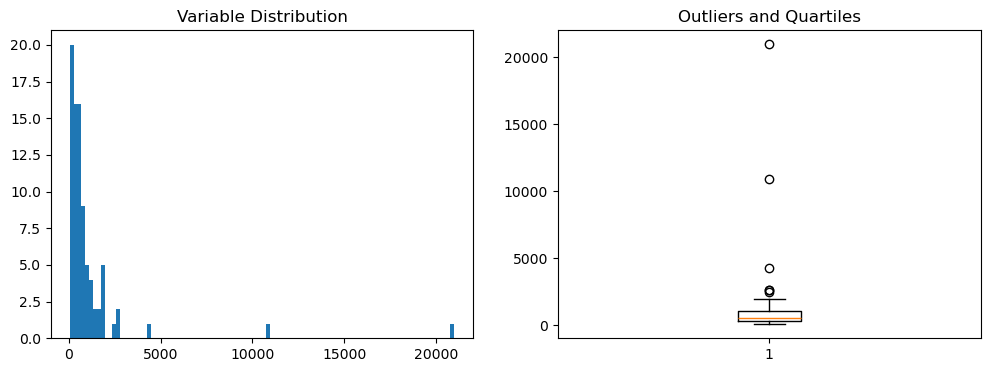

In [332]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(city_data["Population Density"].dropna(), bins = 100) 
ax2.boxplot(city_data["Population Density"].dropna()) 

ax1.set_title("Variable Distribution") 
ax2.set_title("Outliers and Quantiles") 

plt.show()

In [346]:
print(f"The meadian is {city_data['Population Density'].median()}, Q1 is {city_data['Population Density'].quantile(0.25)} and Q3 is {city_data['Population Density'].quantile(0.75)}")

The meadian is 548.0, Q1 is 304.0 and Q3 is 1020.0


In [365]:
city_data['Population Density'].describe()

count       85.000000
mean      1115.141176
std       2542.778533
min         65.000000
25%        304.000000
50%        548.000000
75%       1020.000000
max      20983.000000
Name: Population Density, dtype: float64